<h1> House Grade Prediction </h1>

<h3>Overview :-</h3>
<h5>Find The Best House: The 1234ABC Realtors limited is in great losses due to the autmoation in the industry and the new innovations and players in the real estate market . So they have hired a Data Science Team to give them a business solution so as to help regain their place in the market.<br>
<br>
In order to do that, the group thought of a compiled way of grading the houses in order from a toe with respect to different aspects in mind. This would help them to rate the houses as well as different areas as well. So gear up and help the realtors get back their place in the market.</h5>

In [ ]:
import pandas as pd, numpy as np,seaborn as sns, matplotlib.pyplot as plt,warnings
warnings.filterwarnings("ignore")

<h3>About the Dataset</h3>

<pre>Training File --> All features and the target variable is present in this file.
                  Machine learning model would trained using this file. This file is to be used for training and
                  validation.<br>Test File -->  This file has all the information we need to check how well the model works, based on what it learned during training</pre>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3>Data Dictionary :</h3>

*   Area(total) : Total area of the plot
*   Trooms : Total Number of rooms in the house
*   Nbedrooms : Number of bedroom in the house
*   Nbwashrooms : Number of washroom attached with bedroom
*   washrooms : total number of washroom in the house
* Roof : Does the house has roof(yes or no)
* Roof(Area) : Total area of the terrace
* Lawn(Area) : Area of the lawn including garden and parking
* Nfloor : Number of floors in the house
* API : Air purity index api is in percentage for example if api is 85 it means its 85% of the standard api for the city.
* ANB : Amenities near by amenities like hospital, park , multiplex , malls etc within 2 miles.
* Expected price : price expected by seller.
* Grade : Grade provided by company that depends on the condition and other features mentioned in the data.*(Note A is best garde and E is worst.)*


In [ ]:
house = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Hackathon Projects/House pred/Dataset/TRAINING_.csv',header = 0,index_col=0 )

In [ ]:
test = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Hackathon Projects/House pred/Dataset/TEST_.csv',header = 0,index_col=0 )

In [ ]:
house.head()
#Here we can clear see Our target "Grade" is on Second last Column, afterwards we will push it to the last column.

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
id,,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$


<h3>Check Your Data</h3>

In [ ]:
house.shape

(7000, 13)

In [ ]:
house.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

<h3>Exploratory Data Analysis</h3>

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area(total)  7000 non-null   int64  
 1   Troom        6998 non-null   float64
 2   Nbedrooms    6997 non-null   float64
 3   Nbwashrooms  6998 non-null   float64
 4   Twashrooms   6999 non-null   float64
 5   roof         5647 non-null   object 
 6   Roof(Area)   5647 non-null   float64
 7   Lawn(Area)   6998 non-null   float64
 8   Nfloors      7000 non-null   int64  
 9   API          6999 non-null   float64
 10  ANB          7000 non-null   int64  
 11  Grade        7000 non-null   object 
 12  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 765.6+ KB


In [ ]:
house.isnull().sum()
#So we can clearly see that there are 2 columns with Many Null values present in the rows, So Lets Deal With It!

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [ ]:
house.duplicated().sum()
#there are No dupicates in the data

0

In [ ]:
# for i in stud.columns:
#   print({i:stud[i].unique()})

In [ ]:
house.roof.value_counts()
#So this might be a problem to convert this catergory Lowercase with the Uppercase "YES" and "NO"

no     1436
NO     1419
yes    1413
YES    1379
Name: roof, dtype: int64

In [ ]:
house.roof.replace({"no":"NO","yes":"YES"},inplace=True)
house.roof.value_counts()

NO     2855
YES    2792
Name: roof, dtype: int64

In [ ]:
# house["Roof(Area)"].fillna(100, inplace = True) This Code might be the actual mean for this column But i found the best number below.
house["Roof(Area)"].fillna(100, inplace = True) # Filling that null values with 100 randomly.

In [ ]:
house["Roof(Area)"].replace(100, 93.20276252877634, inplace = True) # But i founded the actual value to fit for this dataset to go more close to accuracy.

In [ ]:
house["Roof(Area)"].isnull().sum()

0

In [ ]:
house["Roof(Area)"].value_counts()

0.000000      2855
93.202763     1398
111.000000      68
88.000000       65
95.000000       64
84.000000       64
80.000000       63
112.000000      63
90.000000       62
114.000000      62
117.000000      61
94.000000       61
107.000000      61
82.000000       61
71.000000       61
79.000000       60
98.000000       60
72.000000       60
101.000000      59
118.000000      59
78.000000       59
93.000000       58
99.000000       58
106.000000      58
73.000000       57
119.000000      56
97.000000       56
120.000000      56
108.000000      56
89.000000       56
109.000000      55
104.000000      55
75.000000       54
105.000000      54
91.000000       53
87.000000       53
113.000000      53
102.000000      52
74.000000       52
77.000000       52
86.000000       52
81.000000       51
115.000000      51
76.000000       51
96.000000       51
110.000000      50
103.000000      49
85.000000       48
92.000000       47
83.000000       42
116.000000      38
Name: Roof(Area), dtype: int64

In [ ]:
house.isnull().sum()

Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)        0
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

<h2>Missing Data Imputation :- </h2>

<pre><h4>The dataset contains a small number of missing values, which can be addressed by imputing them with appropriate statistics.
* For numerical features, we can replace the missing values with the mean,
* while for categorical features, we can impute them with the mode.
This approach helps ensure that the dataset remains complete and suitable for analysis.</h4></pre>

In [ ]:
for x in house.columns:
    if house[x].dtype=="object" or house[x].dtype=="bool":
        house[x].fillna(house[x].mode()[0], inplace=True)
    elif house[x].dtype=="int64" or house[x].dtype=="float64":
        house[x].fillna(round(house[x].mean()), inplace=True)

In [ ]:
house.isnull().sum()
#So data has No Null values right now.

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
roof           0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
Grade          0
EXPECTED       0
dtype: int64

<h3>HeatMap</h3> ----> Check the Correlation between the variables.

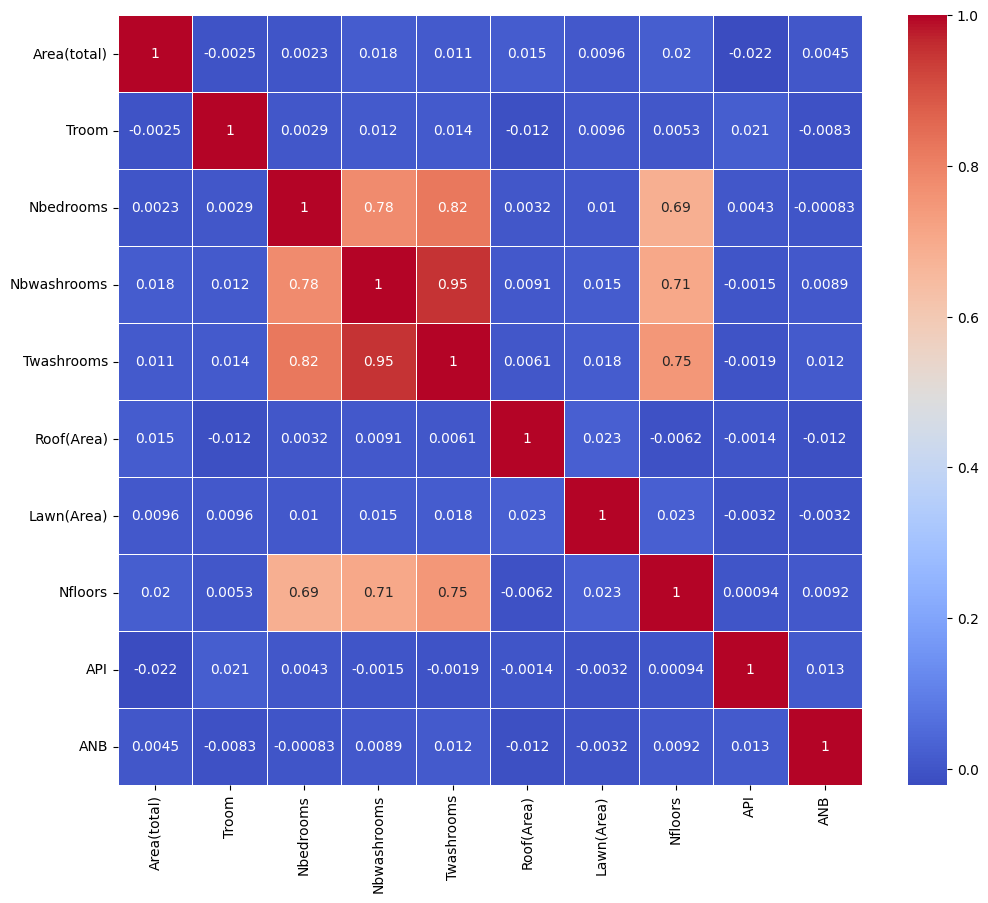

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'house' is your DataFrame
# Replace 'scaled' with the actual column you want to analyze

plt.figure(figsize=(12, 10))  # Setting the size of the heatmap

# Creating a heatmap for the correlation matrix of the specified column
sns.heatmap(house.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Displaying the plot
plt.show()


<h3>Droping the Column</h3>

In [ ]:
house.drop(columns=['roof'], inplace=True)
# As per the domain knowledge, you can just see the two columns "roof" and "Roof(Area)" where you can clear see that there is no benefit to keep "roof" that's why i have drop 'roof' column.

In [ ]:
house.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'Grade',
       'EXPECTED'],
      dtype='object')

In [ ]:
house.shape

(7000, 12)

<h1>LabelEncoder() </h2> --> Covert Categorical Data to Numerical

In [ ]:
col=[]
for x in house.columns:
  if house[x].dtypes == "object":
    col.append(x)
col

['Grade', 'EXPECTED']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    house[x]=le.fit_transform(house[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Grade
mapping {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
Feature EXPECTED
mapping {'2717$': 0, '2743$': 1, '2786$': 2, '2801$': 3, '2802$': 4, '2808$': 5, '2834$': 6, '2839$': 7, '2846$': 8, '2849$': 9, '2860$': 10, '2869$': 11, '2882$': 12, '2885$': 13, '2904$': 14, '2905$': 15, '2908$': 16, '2913$': 17, '2923$': 18, '2927$': 19, '2939$': 20, '2940$': 21, '2941$': 22, '2944$': 23, '2960$': 24, '2964$': 25, '2972$': 26, '2976$': 27, '2978$': 28, '2979$': 29, '2981$': 30, '2983$': 31, '2990$': 32, '2994$': 33, '2995$': 34, '2996$': 35, '3005$': 36, '3006$': 37, '3007$': 38, '3011$': 39, '3012$': 40, '3015$': 41, '3017$': 42, '3019$': 43, '3020$': 44, '3021$': 45, '3022$': 46, '3023$': 47, '3029$': 48, '3030$': 49, '3031$': 50, '3033$': 51, '3040$': 52, '3041$': 53, '3042$': 54, '3046$': 55, '3048$': 56, '3049$': 57, '3050$': 58, '3051$': 59, '3053$': 60, '3054$': 61, '3055$': 62, '3060$': 63, '3061$': 64, '3063$': 65, '3064$': 66, '3065$': 67, '3066$': 68, '3067$': 69, '3068$': 70

In [ ]:
cols = house.columns.tolist()
cols = cols[:-2] + [cols[-1]] + [cols[-2]]
house = house[cols]
#This code rearranges the columns of the DataFrame "house" by moving the last column to the second-to-last position and vice versa.

In [ ]:
house.head(2)
#No our target column has been push to the last for the spliting process.

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,
1,305,8.0,2.0,1.0,3.0,0.0,76.0,2,63.0,4,763,3
2,344,6.0,7.0,7.0,8.0,0.0,83.0,7,97.0,1,1391,1


<h3>Spliting the Data</h3> ----> Into train and test(validation) :- train_test_split()

In [ ]:
house.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [ ]:
X = house.values[:,:-1]
Y = house.values[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25,random_state = 45)

<h3>Scalling the Data</h3> ----> Using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = house.columns[:-1])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = house.columns[:-1])

In [ ]:
x_train = X_train_scaled
x_test = X_test_scaled

In [ ]:
# x_train

In [ ]:
# x_test

<h1>Building the Model</h1> ---> We're constructing a predictive model for house grades using our dataset

<h3>Support Vector Classification Model</h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(C = 230,
          gamma = 0.023,
          kernel = "rbf",
          random_state = 17)
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_test)

print("x_train,y_train",svc.score(x_train,y_train))
print("accuracy score",accuracy_score(y_test, Y_pred))

x_train,y_train 0.9923809523809524
accuracy score 0.9691428571428572


In [ ]:
cfm = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix for SVC:")
print(cfm)

classification_rep = classification_report(y_test, Y_pred)
print("Classification Report for SVC:")
print(classification_rep)

accuracy_score = accuracy_score(y_test, Y_pred)
print("Accuracy of the SVC model:", accuracy_score)

Confusion Matrix for SVC:
[[106   4   0   0   0]
 [  4 348  16   0   0]
 [  0   6 747  14   0]
 [  0   0   9 488   1]
 [  0   0   0   0   7]]
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       110
         1.0       0.97      0.95      0.96       368
         2.0       0.97      0.97      0.97       767
         3.0       0.97      0.98      0.98       498
         4.0       0.88      1.00      0.93         7

    accuracy                           0.97      1750
   macro avg       0.95      0.97      0.96      1750
weighted avg       0.97      0.97      0.97      1750

Accuracy of the SVC model: 0.9691428571428572


In [ ]:
# # Get the best parameters
# """best_params = grid_search.best_params_"""

# # Print the best parameters
# print("Best Parameters:")
# for param, value in best_params.items():
#     print(f"{param}: {value}")

<h2>Test Data</h2>

We will use the same steps on the test data as we did on the training data, including the SVC Model we've seen before, to achieve the highest accuracy.

In [ ]:
test = pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Hackathon Projects/House pred/Dataset/TEST_.csv',header = 0,index_col=0 )

In [ ]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,B
2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,D
3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,C
4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,B
5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,D


In [ ]:
test.shape

(3299, 13)

In [ ]:
test.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'roof', 'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [ ]:
test.isnull().sum()

Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
Grade            0
dtype: int64

<h2>Missing Data Imputation :- </h2>

<h4>"The dataset contains a small number of missing values, which can be addressed by imputing them with appropriate statistics. For numerical features, we can replace the missing values with the mean, while for categorical features, we can impute them with the mode. This approach helps ensure that the dataset remains complete and suitable for analysis." </h4>

In [ ]:
for x in test.columns:
    if test[x].dtype=="object" or test[x].dtype=="bool":
        test[x].fillna(test[x].mode()[0], inplace=True)
    elif test[x].dtype=="int64" or test[x].dtype=="float64":
        test[x].fillna(round(test[x].mean()), inplace=True)

<h3>Drop the Column</h3>

In [ ]:
test.drop(columns=['roof'],axis= 1, inplace=True)

In [ ]:
test["Roof(Area)"].fillna(100, inplace = True)

In [ ]:
test["Roof(Area)"].replace(100,93.20276252877634,inplace = True)

In [ ]:
test["Roof(Area)"].value_counts()

0.000000      1340
47.000000      653
84.000000       44
105.000000      40
113.000000      35
88.000000       34
96.000000       34
116.000000      33
117.000000      33
112.000000      32
80.000000       32
90.000000       30
75.000000       30
118.000000      30
95.000000       29
103.000000      29
120.000000      29
86.000000       29
97.000000       28
91.000000       28
98.000000       28
93.000000       27
114.000000      27
102.000000      27
94.000000       26
79.000000       25
82.000000       25
78.000000       25
115.000000      25
92.000000       25
81.000000       24
87.000000       24
93.202763       24
77.000000       24
72.000000       24
85.000000       23
73.000000       23
107.000000      22
76.000000       22
74.000000       22
108.000000      21
109.000000      21
119.000000      21
83.000000       21
71.000000       21
111.000000      20
99.000000       20
101.000000      19
104.000000      18
106.000000      18
110.000000      18
89.000000       17
Name: Roof(A

In [ ]:
test.isnull().sum()

Area(total)    0
Troom          0
Nbedrooms      0
Nbwashrooms    0
Twashrooms     0
Roof(Area)     0
Lawn(Area)     0
Nfloors        0
API            0
ANB            0
EXPECTED       0
Grade          0
dtype: int64

In [ ]:
test.shape

(3299, 12)

<h1>LabelEncoder() </h2> --> Covert Categorical Data to Numerical

In [ ]:
col=[]
for x in test.columns:
  if test[x].dtypes == "object":
    col.append(x)
col

['EXPECTED', 'Grade']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in col:
    test[x]=le.fit_transform(test[x])

In [ ]:
test.head()

,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
id,,,,,,,,,,,,
1,348,9.0,5.0,3.0,5,47.0,84.0,5,91.0,6,1111,1
2,311,6.0,5.0,5.0,6,0.0,86.0,6,83.0,4,237,3
3,342,5.0,6.0,6.0,7,120.0,85.0,4,95.0,5,796,2
4,329,7.0,7.0,4.0,6,47.0,105.0,5,97.0,6,1023,1
5,307,6.0,2.0,3.0,4,0.0,76.0,2,64.0,4,27,3


In [ ]:
test.columns

Index(['Area(total)', 'Troom', 'Nbedrooms', 'Nbwashrooms', 'Twashrooms',
       'Roof(Area)', 'Lawn(Area)', 'Nfloors', 'API', 'ANB', 'EXPECTED',
       'Grade'],
      dtype='object')

In [ ]:
X = house.values[:,:-1]
Y = house.values[:,-1]

<h3> Standardize test data</h3>

In [ ]:
test = scaler.transform(X)

In [ ]:
# test

<h3>Test Model</h3>



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(C = 230,
          gamma =  0.023,
          kernel = "rbf",
          random_state = 17)
svc.fit(x_train, y_train)
Y_pred = svc.predict(test)

In [ ]:
print("x_train,y_train",svc.score(x_train,y_train))
print("accuracy score",accuracy_score(Y, Y_pred))

x_train,y_train 0.9923809523809524
accuracy score 0.9865714285714285


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y, Y_pred)
print("Confusion Matrix for SVC:")
print(cfm)

classification_rep = classification_report(Y, Y_pred)
print("Classification Report for SVC:")
print(classification_rep)

accuracy_score = accuracy_score(Y, Y_pred)
print("Accuracy of the SVC model:", accuracy_score)

Confusion Matrix for SVC:
[[ 437    5    0    0    0]
 [   5 1444   26    0    0]
 [   0   11 2891   26    0]
 [   0    0   20 2108    1]
 [   0    0    0    0   26]]
Classification Report for SVC:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       442
         1.0       0.99      0.98      0.98      1475
         2.0       0.98      0.99      0.99      2928
         3.0       0.99      0.99      0.99      2129
         4.0       0.96      1.00      0.98        26

    accuracy                           0.99      7000
   macro avg       0.98      0.99      0.99      7000
weighted avg       0.99      0.99      0.99      7000

Accuracy of the SVC model: 0.9865714285714285


Summary: House Grade Prediction

<p>We made our house grade predictions super accurate. We found that Support Vector Classification (SVC) worked really well for us and achieving an impressive accuracy of 98.6% on the test data.</p>
<p>By smartly removing a column and filling in missing info cleverly, we boosted our accuracy a lot. We tried out different methods, but SVC was the star. Even though our current method is doing great, we suggest trying more approaches. Who knows, there might be an even better way to predict house grades!</p>




